## Lets Say Bismillah

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

In [7]:
digits = load_digits()

In [8]:
from sklearn.model_selection import GridSearchCV

In [13]:
clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors' : [3,10,15]
},cv=5, return_train_score=False)
clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.00085063, 0.00190187, 0.00100107]),
 'std_fit_time': array([0.00027342, 0.00332671, 0.000895  ]),
 'mean_score_time': array([0.00178404, 0.00181541, 0.01367307]),
 'std_score_time': array([0.00048533, 0.00126843, 0.01466661]),
 'param_n_neighbors': masked_array(data=[3, 10, 15],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3}, {'n_neighbors': 10}, {'n_neighbors': 15}],
 'split0_test_score': array([0.95555556, 0.93055556, 0.93333333]),
 'split1_test_score': array([0.95833333, 0.94722222, 0.95      ]),
 'split2_test_score': array([0.96657382, 0.96935933, 0.96935933]),
 'split3_test_score': array([0.98607242, 0.97771588, 0.97214485]),
 'split4_test_score': array([0.96657382, 0.94986072, 0.94707521]),
 'mean_test_score': array([0.96662179, 0.95494274, 0.95438254]),
 'std_test_score': array([0.01067232, 0.01677273, 0.01452912]),
 'rank_test_score': array([1, 2, 3])}

In [14]:
dfc = pd.DataFrame(clf.cv_results_)
dfc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000851,0.000273,0.001784,0.000485,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,1
1,0.001902,0.003327,0.001815,0.001268,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,2
2,0.001001,0.000895,0.013673,0.014667,15,{'n_neighbors': 15},0.933333,0.950000,0.969359,0.972145,0.947075,0.954383,0.014529,3


In [15]:
dfc[['param_n_neighbors','params','mean_test_score']]

,param_n_neighbors,params,mean_test_score
0,3,{'n_neighbors': 3},0.966622
1,10,{'n_neighbors': 10},0.954943
2,15,{'n_neighbors': 15},0.954383


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state= 42)

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 37]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truht')

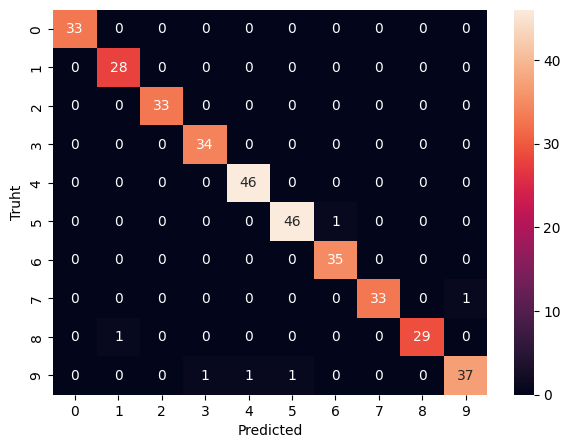

In [24]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truht')

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

